In [1]:
epochs = 100

In [2]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/admin/miniconda3/env

In [3]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
#from gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel.sklearn import RBFClassifier, make_model_gkernel3, make_model_gkernel1

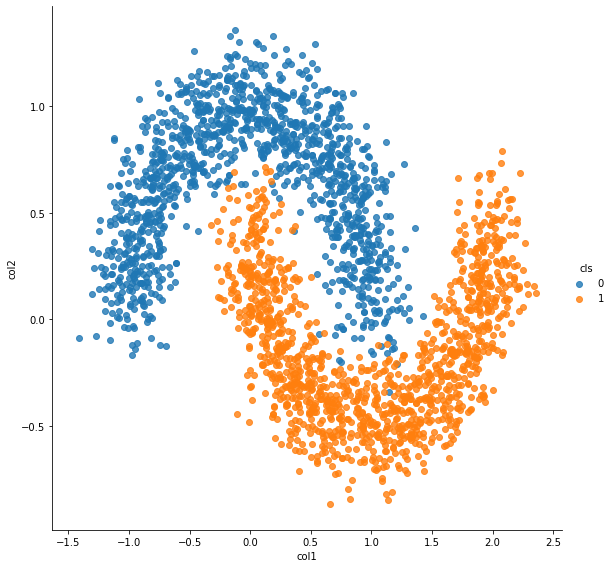

In [4]:
from sklearn.datasets import make_moons

n_samples = 2500
X, y = make_moons(n_samples=n_samples, noise=.15, random_state=0)
df = pd.DataFrame(X)
df.columns = ["col1", "col2"]
df['cls'] = y

sns.lmplot("col1", "col2", hue="cls", data=df, fit_reg=False, height=8)

In [5]:
X.shape, X.min(), X.max()

((2500, 2), -1.4162335410213718, 2.3583974973883515)

In [6]:
y.shape

(2500,)

In [7]:
N = y.shape[0]
y2 = keras.utils.to_categorical(y, num_classes=2)
y2.shape
index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = y2[index[index % 2 == 0]]

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, validation_curve
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, Lasso
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, r2_score, make_scorer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import joblib

from lightgbm import LGBMClassifier

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
def f1_scorer(estimator, X, y):
    pred = estimator.predict(X)
    s = f1_score(y, pred, average='macro')
    return s

## confirm vector input and matrix input

In [11]:
clf = RBFClassifier(
    num_lm=10,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 10)],
    make_model_gkernel=make_model_gkernel3,
    reg_l1=0.00,
    gamma='scale',
    #lr=0.02,
    random_state=101
)
clf

### matrix input

In [12]:
ytrain[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [13]:
%%time
hst = clf.fit(xtrain, ytrain, epochs=epochs, batch_size=250, verbose=0)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
CPU times: user 2.87 s, sys: 64 ms, total: 2.93 s
Wall time: 2.67 s


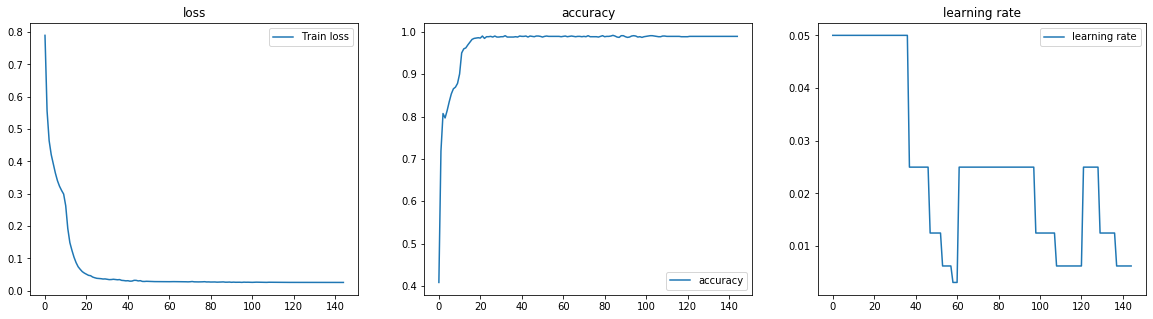

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [15]:
clf.sk_params

{'num_lm': 10, 'lm': array([[-0.1607128 ,  1.1888829 ],
        [ 1.42623095, -0.55190766],
        [-0.16569006,  0.9239571 ],
        [-0.86609744,  0.6307992 ],
        [-0.61546514,  0.26456497],
        [-0.8202838 , -0.08579624],
        [-1.41623354, -0.08783705],
        [-0.81381946,  0.9486054 ],
        [ 0.98796944,  0.59829377],
        [-0.93931195,  0.33225538]]), 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3(nn=4, num_lm=2, random_state=None, lm=None, gamma=None)>, 'reg_l1': 0.0, 'gamma': 'scale', 'random_state': 101, 'num_cls': 2, 'nn': None, 'lr': None, 'callbacks': None, 'epochs_warmup': 10, 'loss': None}

In [16]:
clf.sk_params

{'num_lm': 10, 'lm': array([[-0.1607128 ,  1.1888829 ],
        [ 1.42623095, -0.55190766],
        [-0.16569006,  0.9239571 ],
        [-0.86609744,  0.6307992 ],
        [-0.61546514,  0.26456497],
        [-0.8202838 , -0.08579624],
        [-1.41623354, -0.08783705],
        [-0.81381946,  0.9486054 ],
        [ 0.98796944,  0.59829377],
        [-0.93931195,  0.33225538]]), 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3(nn=4, num_lm=2, random_state=None, lm=None, gamma=None)>, 'reg_l1': 0.0, 'gamma': 'scale', 'random_state': 101, 'num_cls': 2, 'nn': None, 'lr': None, 'callbacks': None, 'epochs_warmup': 10, 'loss': None}

In [17]:
clf.current_gamma()

2.7058282

In [18]:
clf.predict(xtrain)[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [19]:
clf.predict_proba(xtrain)[:5]

array([[6.3936803e-03, 9.9360633e-01],
       [9.9544096e-01, 4.5590689e-03],
       [1.3634655e-02, 9.8636532e-01],
       [9.9964988e-01, 3.5007796e-04],
       [9.4775712e-01, 5.2242823e-02]], dtype=float32)

In [20]:
clf.score(xtrain, ytrain)

1250/1250 [==============================] - 0s 122us/step


0.9896

In [21]:
clf.score(xtest, yans)

1250/1250 [==============================] - 0s 18us/step


0.992

In [22]:
print('F1_SCORE :', f1_score(np.argmax(ytrain,axis=1), clf.predict(xtrain), average='macro'))
print(classification_report(np.argmax(ytrain,axis=1), clf.predict(xtrain)))
print(confusion_matrix(np.argmax(ytrain,axis=1), clf.predict(xtrain)))

F1_SCORE : 0.9895700351281217
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[585   7]
 [  6 652]]


In [23]:
print('F1_SCORE :', f1_score(np.argmax(yans,axis=1), clf.predict(xtest), average='macro'))
print(classification_report(np.argmax(yans,axis=1), clf.predict(xtest)))
print(confusion_matrix(np.argmax(yans,axis=1), clf.predict(xtest)))

F1_SCORE : 0.9919802701814897
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      0.99      0.99       592

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[651   7]
 [  3 589]]


In [24]:
lm = clf.current_lm()
lm.shape

(10, 2)

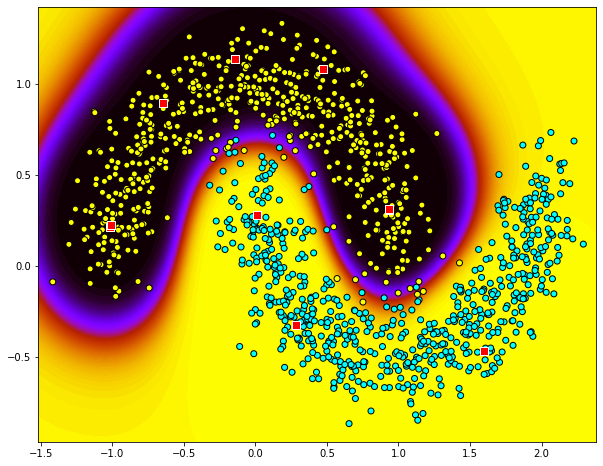

In [25]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], c='red', s=64, marker='s', edgecolors='w')

### vector input

In [26]:
np.argmax(ytrain, axis=1)[:5]

array([1, 0, 1, 0, 0])

In [27]:
%%time
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=epochs, batch_size=250, verbose=0)

CPU times: user 2.31 s, sys: 31.6 ms, total: 2.34 s
Wall time: 2.16 s


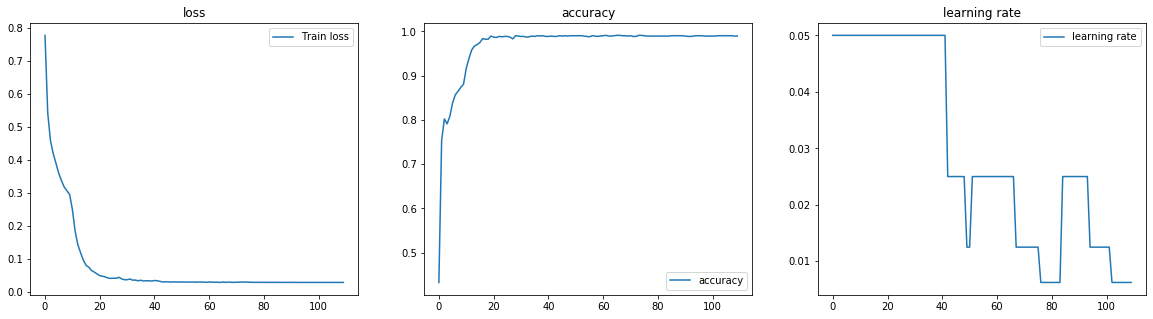

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [29]:
clf.sk_params

{'num_lm': 10, 'lm': array([[-0.1607128 ,  1.1888829 ],
        [ 1.42623095, -0.55190766],
        [-0.16569006,  0.9239571 ],
        [-0.86609744,  0.6307992 ],
        [-0.61546514,  0.26456497],
        [-0.8202838 , -0.08579624],
        [-1.41623354, -0.08783705],
        [-0.81381946,  0.9486054 ],
        [ 0.98796944,  0.59829377],
        [-0.93931195,  0.33225538]]), 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3(nn=4, num_lm=2, random_state=None, lm=None, gamma=None)>, 'reg_l1': 0.0, 'gamma': 'scale', 'random_state': 101, 'num_cls': 2, 'nn': None, 'lr': None, 'callbacks': None, 'epochs_warmup': 10, 'loss': None}

In [30]:
clf.current_gamma()

2.514452

In [31]:
clf.predict(xtrain)[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [32]:
clf.predict_proba(xtrain)[:5]

array([[5.6284848e-03, 9.9437153e-01],
       [9.9490649e-01, 5.0934493e-03],
       [2.3758817e-02, 9.7624117e-01],
       [9.9942672e-01, 5.7329959e-04],
       [9.4755590e-01, 5.2444100e-02]], dtype=float32)

In [33]:
clf.score(xtrain, np.argmax(ytrain, axis=1))

1250/1250 [==============================] - 0s 122us/step


0.9904

In [34]:
clf.score(xtest, np.argmax(yans,axis=1))

1250/1250 [==============================] - 0s 22us/step


0.9912

In [35]:
print('F1_SCORE :', f1_score(np.argmax(ytrain,axis=1), clf.predict(xtrain), average='macro'))
print(classification_report(np.argmax(ytrain,axis=1), clf.predict(xtrain)))
print(confusion_matrix(np.argmax(ytrain,axis=1), clf.predict(xtrain)))

F1_SCORE : 0.9903715058194618
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[585   7]
 [  5 653]]


In [36]:
print('F1_SCORE :', f1_score(np.argmax(yans,axis=1), clf.predict(xtest), average='macro'))
print(classification_report(np.argmax(yans,axis=1), clf.predict(xtest)))
print(confusion_matrix(np.argmax(yans,axis=1), clf.predict(xtest)))

F1_SCORE : 0.9911789933018087
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      0.99      0.99       592

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[650   8]
 [  3 589]]


In [37]:
lm = clf.current_lm()
lm.shape

(10, 2)

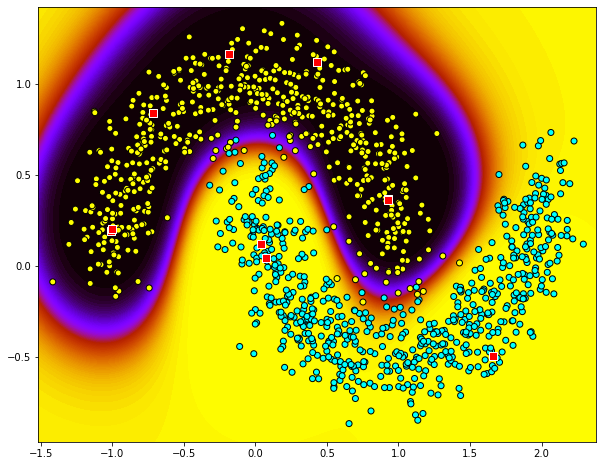

In [38]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], c='red', s=64, marker='s', edgecolors='w')

In [39]:
clf.sk_params

{'num_lm': 10, 'lm': array([[-0.1607128 ,  1.1888829 ],
        [ 1.42623095, -0.55190766],
        [-0.16569006,  0.9239571 ],
        [-0.86609744,  0.6307992 ],
        [-0.61546514,  0.26456497],
        [-0.8202838 , -0.08579624],
        [-1.41623354, -0.08783705],
        [-0.81381946,  0.9486054 ],
        [ 0.98796944,  0.59829377],
        [-0.93931195,  0.33225538]]), 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3(nn=4, num_lm=2, random_state=None, lm=None, gamma=None)>, 'reg_l1': 0.0, 'gamma': 'scale', 'random_state': 101, 'num_cls': 2, 'nn': None, 'lr': None, 'callbacks': None, 'epochs_warmup': 10, 'loss': None}

## Select initial LM with GaussianMixture
* train LM
* num_lm = 15

In [40]:
num_lm = 15

from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
gm = GaussianMixture(n_components=num_lm, covariance_type='tied')
gm.fit(xtrain)
gm.means_

array([[ 0.18739511,  0.9536097 ],
       [ 0.99977373, -0.13078342],
       [-0.76883317,  0.68020255],
       [ 1.84451842, -0.05727921],
       [ 0.27163556, -0.20998488],
       [-0.98340558,  0.21777892],
       [-0.2854008 ,  0.93818412],
       [ 0.83720915,  0.58941301],
       [ 0.61305593, -0.43717221],
       [ 1.51651081, -0.33825106],
       [ 0.94618574,  0.24620446],
       [ 1.96979978,  0.31443418],
       [ 1.10842042, -0.50553482],
       [ 0.04172062,  0.22904334],
       [ 0.57022895,  0.83369016]])

In [41]:
init_gamma = 1 / (2*np.diag(gm.covariances_).mean()*num_lm/2)
init_gamma

2.6981380339907703

In [42]:
clf = RBFClassifier(
    num_lm=num_lm,
    lm=gm.means_,
    make_model_gkernel=make_model_gkernel3,
    #gamma='scale',
    gamma=init_gamma,
    random_state=101
)
clf

In [43]:
np.argmax(ytrain, axis=1)[:5]

array([1, 0, 1, 0, 0])

In [44]:
%%time
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=epochs, batch_size=250, verbose=0)

CPU times: user 2.37 s, sys: 30.1 ms, total: 2.4 s
Wall time: 2.23 s


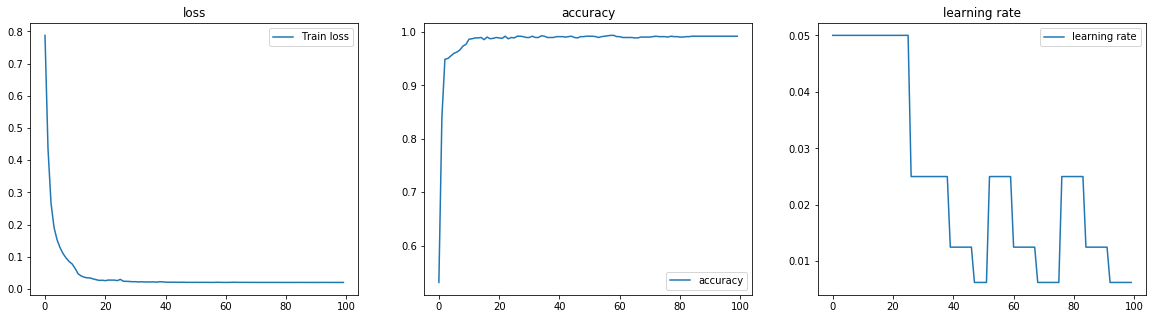

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [46]:
clf.sk_params

{'num_lm': 15, 'lm': array([[ 0.18739511,  0.9536097 ],
        [ 0.99977373, -0.13078342],
        [-0.76883317,  0.68020255],
        [ 1.84451842, -0.05727921],
        [ 0.27163556, -0.20998488],
        [-0.98340558,  0.21777892],
        [-0.2854008 ,  0.93818412],
        [ 0.83720915,  0.58941301],
        [ 0.61305593, -0.43717221],
        [ 1.51651081, -0.33825106],
        [ 0.94618574,  0.24620446],
        [ 1.96979978,  0.31443418],
        [ 1.10842042, -0.50553482],
        [ 0.04172062,  0.22904334],
        [ 0.57022895,  0.83369016]]), 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3(nn=4, num_lm=2, random_state=None, lm=None, gamma=None)>, 'gamma': 2.6981380339907703, 'random_state': 101, 'loss': None, 'num_cls': 2, 'nn': None, 'lr': None, 'callbacks': None, 'epochs_warmup': 10}

In [47]:
clf.current_gamma()

3.3283517

In [48]:
clf.predict(xtrain)[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [49]:
clf.predict_proba(xtrain)[:5]

array([[2.6503592e-04, 9.9973494e-01],
       [9.9839216e-01, 1.6078379e-03],
       [2.9451236e-02, 9.7054875e-01],
       [9.9919671e-01, 8.0327457e-04],
       [9.6711385e-01, 3.2886125e-02]], dtype=float32)

In [50]:
clf.score(xtrain, np.argmax(ytrain, axis=1))

1250/1250 [==============================] - 0s 123us/step


0.992

In [51]:
clf.score(xtest, np.argmax(yans,axis=1))

1250/1250 [==============================] - 0s 19us/step


0.992

In [52]:
print('F1_SCORE :', f1_score(np.argmax(ytrain,axis=1), clf.predict(xtrain), average='macro'))
print(classification_report(np.argmax(ytrain,axis=1), clf.predict(xtrain)))
print(confusion_matrix(np.argmax(ytrain,axis=1), clf.predict(xtrain)))

F1_SCORE : 0.9919762548495517
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[586   6]
 [  4 654]]


In [53]:
print('F1_SCORE :', f1_score(np.argmax(yans,axis=1), clf.predict(xtest), average='macro'))
print(classification_report(np.argmax(yans,axis=1), clf.predict(xtest)))
print(confusion_matrix(np.argmax(yans,axis=1), clf.predict(xtest)))

F1_SCORE : 0.9919802701814897
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      0.99      0.99       592

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[651   7]
 [  3 589]]


In [54]:
lm = clf.current_lm()
lm.shape

(15, 2)

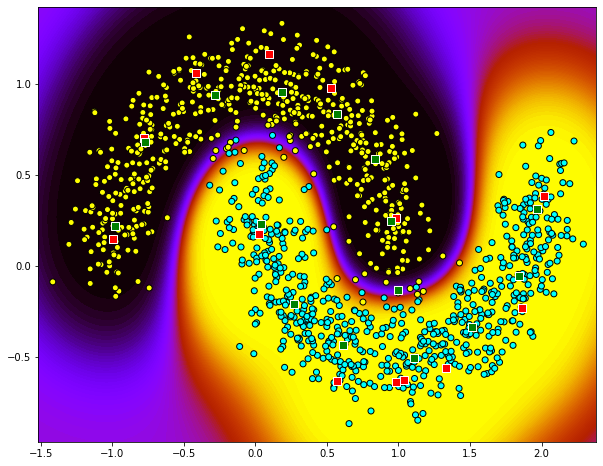

In [55]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], c='red', s=64, marker='s', edgecolors='w')
plt.scatter(gm.means_[:,0], gm.means_[:,1], c='green', s=64, marker='s', edgecolors='w')

In [56]:
clf.sk_params

{'num_lm': 15, 'lm': array([[ 0.18739511,  0.9536097 ],
        [ 0.99977373, -0.13078342],
        [-0.76883317,  0.68020255],
        [ 1.84451842, -0.05727921],
        [ 0.27163556, -0.20998488],
        [-0.98340558,  0.21777892],
        [-0.2854008 ,  0.93818412],
        [ 0.83720915,  0.58941301],
        [ 0.61305593, -0.43717221],
        [ 1.51651081, -0.33825106],
        [ 0.94618574,  0.24620446],
        [ 1.96979978,  0.31443418],
        [ 1.10842042, -0.50553482],
        [ 0.04172062,  0.22904334],
        [ 0.57022895,  0.83369016]]), 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3(nn=4, num_lm=2, random_state=None, lm=None, gamma=None)>, 'gamma': 2.6981380339907703, 'random_state': 101, 'loss': None, 'num_cls': 2, 'nn': None, 'lr': None, 'callbacks': None, 'epochs_warmup': 10}

## BENCHMARK LogisticRegression

In [57]:
cv_splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.35, random_state=0)
cv_splitter.get_n_splits(xtrain, ytrain)

3

In [58]:
param_name = "C"
param_range = np.logspace(-3, 3, 7)
param_range

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [59]:
%%time

train_scores, test_scores = validation_curve(
    LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga', max_iter=10000),
    xtrain, np.argmax(ytrain, axis=1),
    param_name=param_name, param_range=param_range,
    cv=cv_splitter, n_jobs=1, verbose=2, scoring=f1_scorer)

[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   0.0s
[CV] C=10.0 ..........................................................
[CV] ........................................... C=10.0, total=   0.0s
[CV] C=100.0 .........................................................
[CV] .......................................... C=100.0, total=   0.0s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [60]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
np.c_[param_range, train_scores_mean, test_scores_mean]

array([[1.00000000e-03, 3.29302541e-01, 3.29050648e-01],
       [1.00000000e-02, 8.45719949e-01, 8.42215596e-01],
       [1.00000000e-01, 8.85580495e-01, 8.67805089e-01],
       [1.00000000e+00, 8.89309088e-01, 8.71608912e-01],
       [1.00000000e+01, 8.89309088e-01, 8.71608912e-01],
       [1.00000000e+02, 8.89309088e-01, 8.71608912e-01],
       [1.00000000e+03, 8.89309088e-01, 8.71608912e-01]])

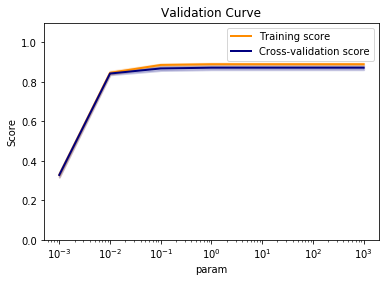

In [61]:
plt.title("Validation Curve")
plt.xlabel("param")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

In [62]:
'''test data'''
est = LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga', max_iter=10000, C=1.0)
est.fit(xtrain, np.argmax(ytrain, axis=1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
pred = est.predict(xtrain)

In [64]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.8820611664487606
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       592
           1       0.89      0.89      0.89       658

    accuracy                           0.88      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.88      0.88      0.88      1250

[[518  74]
 [ 73 585]]


In [65]:
pred_test = est.predict(xtest)

In [66]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.8789824394703822
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       658
           1       0.86      0.88      0.87       592

    accuracy                           0.88      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.88      0.88      0.88      1250

[[576  82]
 [ 69 523]]


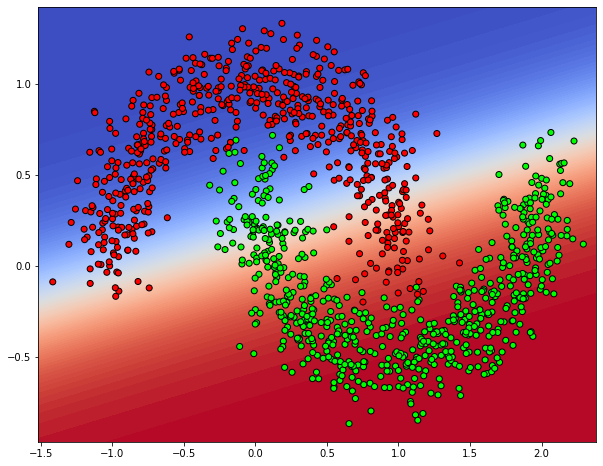

In [67]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

cm = plt.cm.coolwarm
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')

## BENCHMARK LGBMClassifier

In [68]:
cv_splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.35, random_state=0)
cv_splitter.get_n_splits(xtrain, ytrain)

3

In [69]:
param_name = "reg_alpha"
param_range = np.logspace(-3, 3, 7)
param_range

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [70]:
%%time

train_scores, test_scores = validation_curve(
    LGBMClassifier(
        min_child_samples=20,
        reg_alpha=0.1
    ),
    xtrain, np.argmax(ytrain, axis=1),
    param_name=param_name, param_range=param_range,
    cv=cv_splitter, n_jobs=1, verbose=2, scoring=f1_scorer)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] reg_alpha=0.001 .................................................
[CV] .................................. reg_alpha=0.001, total=   0.1s
[CV] reg_alpha=0.01 ..................................................
[CV] ................................... reg_alpha=0.01, total=   0.0s
[CV] reg_alpha=0.1 ...................................................
[CV] .................................... reg_alpha=0.1, total=   0.0s
[CV] reg_alpha=1.0 ...................................................
[CV] .................................... reg_alpha=1.0, total=   0.0s
[CV] reg_alpha=10.0 ..................................................
[CV] ................................... reg_alpha=10.0, total=   0.0s
[CV] reg_alpha=100.0 .................................................
[CV] .................................. reg_alpha=100.0, total=   0.0s
[CV] reg_alpha=1000.0 ................................................
[CV] ................................. reg_alpha=1000.0, total=   0.0s
[CV] r

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished


In [71]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
np.c_[param_range, train_scores_mean, test_scores_mean]

array([[1.00000000e-03, 1.00000000e+00, 9.81685511e-01],
       [1.00000000e-02, 1.00000000e+00, 9.81685511e-01],
       [1.00000000e-01, 1.00000000e+00, 9.80920936e-01],
       [1.00000000e+00, 9.98353344e-01, 9.82441722e-01],
       [1.00000000e+01, 9.91767549e-01, 9.82434278e-01],
       [1.00000000e+02, 8.46597913e-01, 8.21811172e-01],
       [1.00000000e+03, 3.44632768e-01, 3.45291480e-01]])

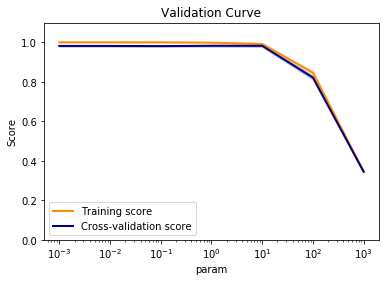

In [72]:
plt.title("Validation Curve")
plt.xlabel("param")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

In [73]:
'''test data'''
est = LGBMClassifier(
        min_child_samples=20,
        reg_alpha=0.1
    )
est.fit(xtrain, np.argmax(ytrain, axis=1))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.1, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [74]:
pred = est.predict(xtrain)

In [75]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       592
           1       1.00      1.00      1.00       658

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

[[592   0]
 [  0 658]]


In [76]:
pred_test = est.predict(xtest)

In [77]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9919802701814897
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      0.99      0.99       592

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[651   7]
 [  3 589]]


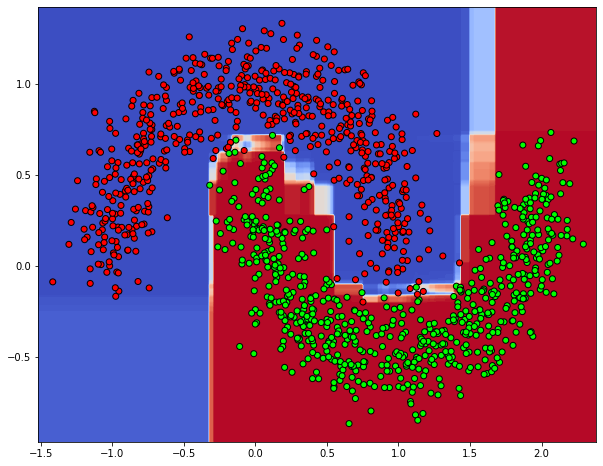

In [78]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

cm = plt.cm.coolwarm
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')

## validation_curve + RBFClassifier
* looking for valid num_lm
* using fixed landmarks

In [79]:
cv_splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.35, random_state=0)
cv_splitter.get_n_splits(xtrain, ytrain)

3

In [80]:
param_name = "num_lm"
param_range = [2, 5, 10, 20, 50, 100, 150, 200, 250, 300]
param_range

[2, 5, 10, 20, 50, 100, 150, 200, 250, 300]

In [81]:
%%time

def f1_scorer_2(estimator, X, y):
    pred = estimator.predict(X)
    s = f1_score(np.argmax(y, axis=1), pred, average='macro')
    return s

train_scores, test_scores = validation_curve(
    RBFClassifier(
        num_lm=2,
        lm_select_from_x=True,
        random_state=None,
        lr=0.05, gamma='scale',
        epochs=epochs, batch_size=250, verbose=0
    ),
    xtrain, ytrain,
    param_name=param_name, param_range=param_range,
    cv=cv_splitter, n_jobs=1, verbose=2, scoring=f1_scorer_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] num_lm=2 ........................................................
[CV] ......................................... num_lm=2, total=   2.2s
[CV] num_lm=5 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ......................................... num_lm=5, total=   2.5s
[CV] num_lm=10 .......................................................
[CV] ........................................ num_lm=10, total=   4.4s
[CV] num_lm=20 .......................................................
[CV] ........................................ num_lm=20, total=   2.7s
[CV] num_lm=50 .......................................................
[CV] ........................................ num_lm=50, total=   2.6s
[CV] num_lm=100 ......................................................
[CV] ....................................... num_lm=100, total=   2.6s
[CV] num_lm=150 ......................................................
[CV] ....................................... num_lm=150, total=   3.4s
[CV] num_lm=200 ......................................................
[CV] ....................................... num_lm=200, total=   3.6s
[CV] num_lm=250 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.6min finished


In [82]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
np.c_[param_range, train_scores_mean, test_scores_mean]

array([[  2.        ,   0.84254988,   0.83757805],
       [  5.        ,   0.89165253,   0.89824016],
       [ 10.        ,   0.97775595,   0.98242257],
       [ 20.        ,   0.9884761 ,   0.98701875],
       [ 50.        ,   0.99135581,   0.98930922],
       [100.        ,   0.99135581,   0.98930922],
       [150.        ,   0.99094457,   0.98854742],
       [200.        ,   0.99094457,   0.98930922],
       [250.        ,   0.99094372,   0.98854742],
       [300.        ,   0.99012124,   0.98930922]])

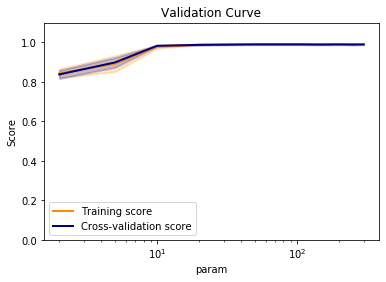

In [83]:
plt.title("Validation Curve")
plt.xlabel("param")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

In [84]:
%%time
'''test data'''
est = RBFClassifier(
    num_lm=50,
    lm_select_from_x=True,
    random_state=None,
    lr=0.05, gamma='scale',
    epochs=epochs, batch_size=250, verbose=0
)
hst = est.fit(xtrain, ytrain)

CPU times: user 2.56 s, sys: 36.3 ms, total: 2.6 s
Wall time: 2.33 s


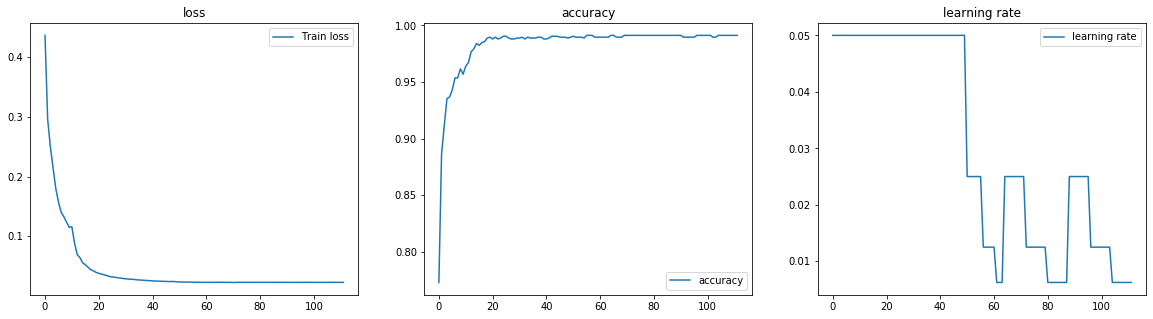

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [86]:
pred = est.predict(xtrain)

In [87]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.991176140283326
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[587   5]
 [  6 652]]


In [88]:
pred_test = est.predict(xtest)

In [89]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9919802701814897
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      0.99      0.99       592

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[651   7]
 [  3 589]]


In [90]:
lm = est.current_lm()
lm.shape

(50, 2)

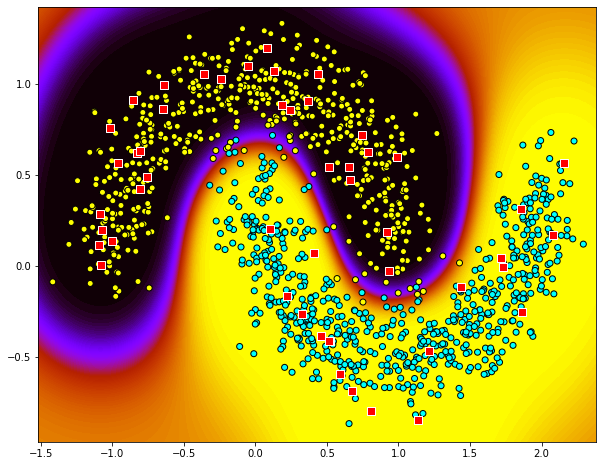

In [91]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], c='red', s=64, marker='s', edgecolors='w')

In [92]:
num_lm = 50
x_min, x_max = xtrain[:, 0].min(), xtrain[:, 0].max()
y_min, y_max = xtrain[:, 1].min(), xtrain[:, 1].max()

init_lm = np.c_[
    np.random.random((num_lm,))*(x_max-x_min)+x_min,
    np.random.random((num_lm,))*(y_max-y_min)+y_min
]

## set gamma to 'scale' (no train)

In [93]:
%%time
est = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    #lm_select_from_x=True,
    random_state=None,
    lr=0.05, gamma='scale',
    make_model_gkernel=make_model_gkernel1,
    epochs=epochs, batch_size=250, verbose=0
)
hst = est.fit(xtrain, ytrain)

CPU times: user 3 s, sys: 41.1 ms, total: 3.04 s
Wall time: 2.69 s


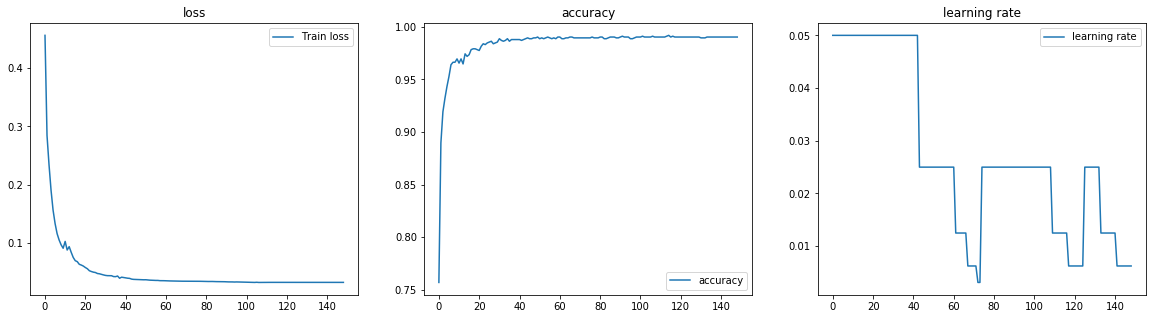

In [94]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [95]:
est.current_gamma(), 1 / (2*xtrain.var())

(0.9167896, 0.916789619521976)

In [96]:
pred = est.predict(xtrain)

In [97]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9903715058194618
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[585   7]
 [  5 653]]


In [98]:
pred_test = est.predict(xtest)

In [99]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9911775896661664
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       658
           1       0.99      0.99      0.99       592

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[651   7]
 [  4 588]]


In [100]:
lm = est.current_lm()
lm.shape

(50, 2)

In [101]:
np.c_[lm, init_lm][:5]

array([[ 1.84035456,  0.52281147,  1.84035461,  0.52281148],
       [-0.18941386,  0.57906646, -0.18941386,  0.57906643],
       [ 1.52281451,  0.23967029,  1.5228145 ,  0.23967029],
       [ 0.85057759, -0.0662775 ,  0.85057759, -0.0662775 ],
       [-0.61308903, -0.57194632, -0.61308904, -0.57194634]])

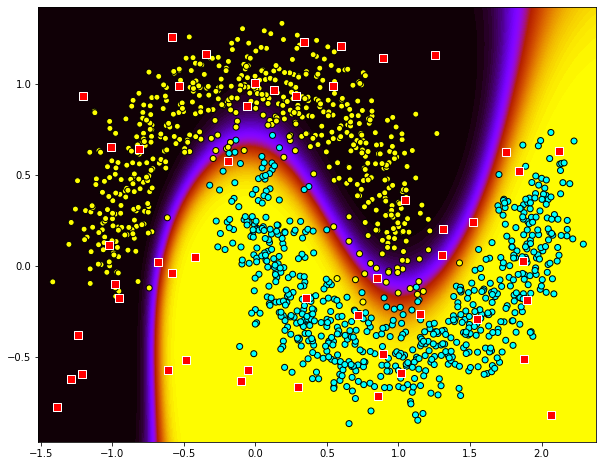

In [102]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], c='red', s=64, marker='s', edgecolors='w')

## set gamma to None (no train)

In [103]:
%%time
est = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    #lm_select_from_x=True,
    random_state=None,
    lr=0.05, gamma=None,
    make_model_gkernel=make_model_gkernel1,
    epochs=epochs, batch_size=250, verbose=0
)
hst = est.fit(xtrain, ytrain)

CPU times: user 5.41 s, sys: 102 ms, total: 5.52 s
Wall time: 4.55 s


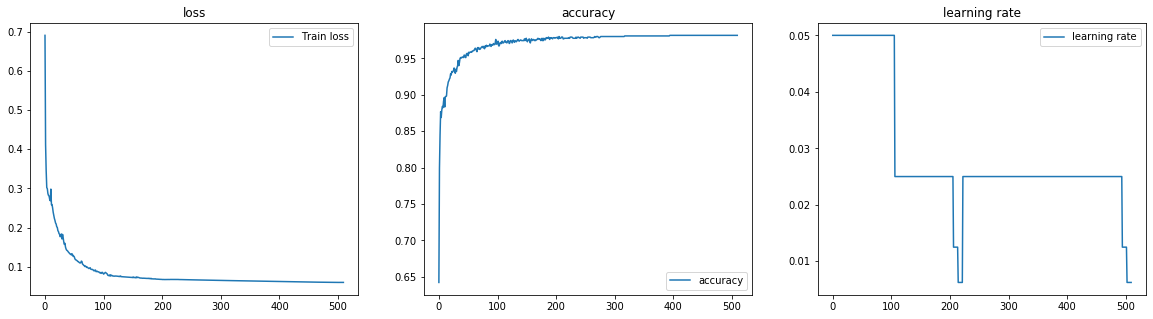

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [105]:
est.current_gamma(), 1/(2*np.sqrt(2/6)*2)

(0.4330127, 0.43301270189221935)

In [106]:
pred = est.predict(xtrain)

In [107]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9815501115015001
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       592
           1       0.98      0.98      0.98       658

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250

[[581  11]
 [ 12 646]]


In [108]:
pred_test = est.predict(xtest)

In [109]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9799522575041106
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       658
           1       0.97      0.98      0.98       592

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250

[[643  15]
 [ 10 582]]


In [110]:
lm = est.current_lm()
lm.shape

(50, 2)

In [111]:
np.c_[lm, init_lm][:5]

array([[ 1.84035456,  0.52281147,  1.84035461,  0.52281148],
       [-0.18941386,  0.57906646, -0.18941386,  0.57906643],
       [ 1.52281451,  0.23967029,  1.5228145 ,  0.23967029],
       [ 0.85057759, -0.0662775 ,  0.85057759, -0.0662775 ],
       [-0.61308903, -0.57194632, -0.61308904, -0.57194634]])

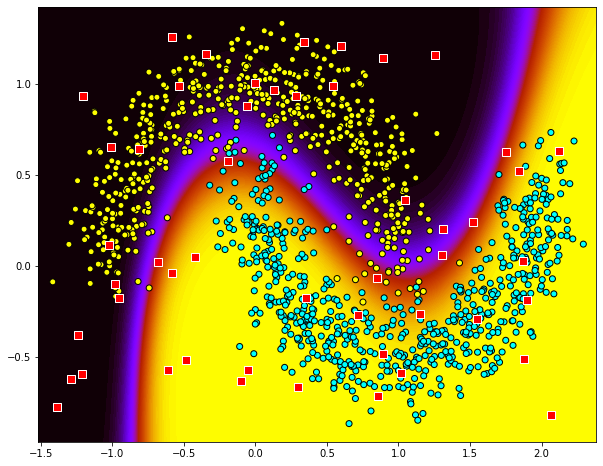

In [112]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], c='red', s=64, marker='s', edgecolors='w')